In [1]:
import pandas as pd

# Load the Excel file
file_path = "ELECTIONS.xlsx"  
sheets = pd.ExcelFile(file_path)

# Display sheet names
print(sheets.sheet_names)

# Load each sheet into a DataFrame
political_form = sheets.parse("Political form")  
sheet1 = sheets.parse("Sheet1") 


['Political form', 'Sheet1']


In [2]:
# View the first few rows
print(political_form.head())

                    start                     end  Enrollment Number  \
0 2023-05-15 15:14:02.994 2023-05-15 15:17:11.162               4001   
1 2023-05-15 22:25:48.557 2023-05-15 22:27:44.505             800116   
2 2023-05-15 22:32:38.130 2023-05-15 22:45:09.993             800111   
3 2023-05-16 10:17:05.512 2023-05-16 10:22:31.477             800140   
4 2023-05-18 08:23:59.311 2023-05-18 08:33:17.272             800146   

                                       Location  _Location_latitude  \
0              -0.3552632 34.7552613 0.0 3000.0           -0.355263   
1              0.336606 37.5641233 1141.9 4.466            0.336606   
2  -1.153349 36.9162069 1537.5999755859375 20.0           -1.153349   
3                -1.2547935 36.9001899 0.0 20.9           -1.254793   
4             -2.6296274 38.1185042 750.603 3.9           -2.629627   

   _Location_longitude  _Location_altitude  _Location_precision  \
0            34.755261            0.000000             3000.000   
1     

In [17]:
political_form.shape

(4537, 42)

In [18]:
# Get information about columns and data types
print(political_form.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4537 entries, 0 to 4536
Data columns (total 42 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                                                                                      --------------  -----         
 0   start                                                                                                                                                                                       4537 non-null   datetime64[ns]
 1   end                                                                                                                                                                                         4537 non-null   datetime64[n

In [24]:
political_form.dtypes

start                                                                                                                                                                                         datetime64[ns]
end                                                                                                                                                                                           datetime64[ns]
Enrollment Number                                                                                                                                                                                      int64
Location                                                                                                                                                                                              object
_Location_latitude                                                                                                                                                                  

In [4]:
# Check for missing values
print(political_form.isnull().sum())

start                                                                                                                                                                                            0
end                                                                                                                                                                                              0
Enrollment Number                                                                                                                                                                                0
Location                                                                                                                                                                                         6
_Location_latitude                                                                                                                                                                               6
_Location_longitude      

In [5]:
missing_percent = (political_form.isnull().sum() / len(political_form)) * 100
print(missing_percent.sort_values(ascending=False))


_notes                                                                                                                                                                                        100.000000
_tags                                                                                                                                                                                         100.000000
_validation_status                                                                                                                                                                            100.000000
If other, specify.                                                                                                                                                                             95.150981
If other specify.                                                                                                                                                                              92.26

In [6]:
columns_to_drop = missing_percent[missing_percent > 50].index
political_form.drop(columns=columns_to_drop, axis=1, inplace=True)
print("Dropped columns:", columns_to_drop)


Dropped columns: Index(['If you didn't vote, what was the reason?', 'If other specify.',
       'If other specify..1', 'If other, specify.', '_validation_status',
       '_notes', '_tags'],
      dtype='object')


In [7]:
remaining_missing = political_form.isnull().sum()
print(remaining_missing[remaining_missing > 0])


Location                                                                                                                                                                                        6
_Location_latitude                                                                                                                                                                              6
_Location_longitude                                                                                                                                                                             6
_Location_altitude                                                                                                                                                                              6
_Location_precision                                                                                                                                                                             6
Date and Time                 

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "ELECTIONS.xlsx"  # Replace with your file path
political_form = pd.read_excel(file_path, sheet_name="Political form")

# Step 1: Drop columns with >50% missing values
missing_percent = (political_form.isnull().sum() / len(political_form)) * 100
columns_to_drop = missing_percent[missing_percent > 50].index
political_form.drop(columns=columns_to_drop, axis=1, inplace=True)

# Step 2: Drop metadata columns if not needed
metadata_cols = ['_uuid', '_index', '_submission_time']
political_form.drop(columns=metadata_cols, axis=1, inplace=True)

# Step 3: Convert `Age` to numeric
political_form['Age'] = pd.to_numeric(political_form['Age'], errors='coerce')

# Step 4: Clean and convert `Monthly Household Income` to numeric
political_form['Monthly Household Income'] = (
    political_form['Monthly Household Income']
    .replace(r'[^\d.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

# Step 5: Fill missing values with 'N/A' or appropriate methods
political_form.fillna("N/A", inplace=True)

# Step 6: Remove duplicates if any
political_form.drop_duplicates(inplace=True)

# Step 7: Reset the index
political_form.reset_index(drop=True, inplace=True)

# Save the cleaned dataset
cleaned_file_path = "Cleaned_ELECTIONS.xlsx"
political_form.to_excel(cleaned_file_path, index=False)

print(f"Dataset cleaned and saved to {cleaned_file_path}.")


C:\Users\Admin\AppData\Local\Temp\ipykernel_1468\3296359249.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  political_form.fillna("N/A", inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1468\3296359249.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  political_form.fillna("N/A", inplace=True)


Dataset cleaned and saved to Cleaned_ELECTIONS.xlsx.


In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load your dataset
data = political_form.copy()  # Replace `political_form` with your DataFrame

### Step 1: Handle Missing Values ###
# Drop columns with >50% missing data
missing_percent = (data.isnull().sum() / len(data)) * 100
columns_to_drop = missing_percent[missing_percent > 50].index
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Impute remaining missing values
# Categorical variables: Mode
categorical_columns = data.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])

# Numerical variables: Median
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

# ### Step 2: Feature Engineering ###
# # Encode categorical variables (One-Hot Encoding)
# encoder = OneHotEncoder(drop='first', sparse=False)
# encoded_columns = pd.DataFrame(
#     encoder.fit_transform(data[categorical_columns]),
#     columns=encoder.get_feature_names_out(categorical_columns),
#     index=data.index
#)

# # Add encoded columns to the dataset
# data = data.drop(categorical_columns, axis=1)
# data = pd.concat([data, encoded_columns], axis=1)

# Create new features
# Age groups
# data['Age_Group'] = pd.cut(data['Age'], bins=[0, 25, 50, 100], labels=['Young', 'Middle-Aged', 'Elderly'])

# # Voting consistency
# data['Voting_Consistency'] = np.where(
#     (data['Did you vote in the previous election?'] == 'Yes') &
#     (data['Would you be willing to vote in the next election?'] == 'Yes'), 1, 0
# )

# # Political interest index (Assuming you have a relevant column)
# data['Political_Interest_Index'] = data[['How interested are you in politics?']].sum(axis=1)

# ### Step 3: Normalization/Scaling ###
# scaler = StandardScaler()
# scaled_columns = scaler.fit_transform(data[numerical_columns])
# scaled_data = pd.DataFrame(scaled_columns, columns=numerical_columns, index=data.index)

# # Replace original numerical columns with scaled ones
# data[numerical_columns] = scaled_data

# ### Step 4: Data Balancing ###
# # Assuming target column is 'Would you be willing to vote in the next election?'
# target = 'Would you be willing to vote in the next election?'
# X = data.drop(target, axis=1)
# y = data[target]

# # Handle imbalanced data using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting data for training and testing
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# print("Data preprocessing complete.")


In [10]:
# Summary statistics
print(political_form.describe())

                               start                            end  \
count                           4537                           4537   
mean   2023-05-30 16:45:37.614602240  2023-05-30 18:59:17.069545984   
min       2023-05-15 15:14:02.994000     2023-05-15 15:17:11.162000   
25%    2023-05-24 10:41:01.983000064  2023-05-24 12:15:47.470000128   
50%    2023-05-29 16:00:15.403000064  2023-05-29 17:22:18.801999872   
75%    2023-06-02 18:48:23.256999936  2023-06-02 22:22:58.919000064   
max       2023-07-01 12:34:35.560000     2023-07-01 12:36:33.100000   
std                              NaN                            NaN   

       Enrollment Number           _id  
count       4.537000e+03  4.537000e+03  
mean        2.914761e+06  2.422134e+08  
min         7.000000e+00  2.383278e+08  
25%         8.001170e+05  2.406055e+08  
50%         8.001330e+05  2.419553e+08  
75%         8.001560e+05  2.431596e+08  
max         8.001772e+07  2.496474e+08  
std         1.277167e+07  2.1065

In [11]:
#For the Political Form Sheet:

# View the first few rows
print(political_form.head())

# Get information about columns and data types
print(political_form.info())

# Check for missing values
print(political_form.isnull().sum())

# Summary statistics
print(political_form.describe())


                    start                     end  Enrollment Number  \
0 2023-05-15 15:14:02.994 2023-05-15 15:17:11.162               4001   
1 2023-05-15 22:25:48.557 2023-05-15 22:27:44.505             800116   
2 2023-05-15 22:32:38.130 2023-05-15 22:45:09.993             800111   
3 2023-05-16 10:17:05.512 2023-05-16 10:22:31.477             800140   
4 2023-05-18 08:23:59.311 2023-05-18 08:33:17.272             800146   

                                       Location _Location_latitude  \
0              -0.3552632 34.7552613 0.0 3000.0          -0.355263   
1              0.336606 37.5641233 1141.9 4.466           0.336606   
2  -1.153349 36.9162069 1537.5999755859375 20.0          -1.153349   
3                -1.2547935 36.9001899 0.0 20.9          -1.254793   
4             -2.6296274 38.1185042 750.603 3.9          -2.629627   

  _Location_longitude _Location_altitude _Location_precision  \
0           34.755261                0.0              3000.0   
1           37.564

In [12]:
#For Sheet 1:

# View the first few rows
#print(sheet1.head())

# Get column details
print(sheet1.info())

# Summary statistics
#print(sheet1.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5 non-null      int64  
 1   Registered voters/turnout  5 non-null      int64  
 2   Total Votes                5 non-null      int64  
 3   Turnout percentage         5 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 292.0 bytes
None


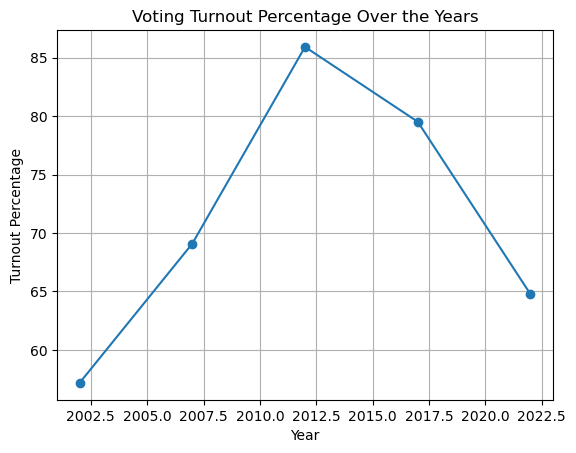

In [13]:
# Plot voting trends over the years
import matplotlib.pyplot as plt

plt.plot(sheet1["Year"], sheet1["Turnout percentage"], marker="o")
plt.title("Voting Turnout Percentage Over the Years")
plt.xlabel("Year")
plt.ylabel("Turnout Percentage")
plt.grid(True)
plt.show()


In [14]:
import pandas as pd

# Load the uploaded files
elections_file_path = 'ELECTIONS.xlsx'
political_form_file_path = 'political_form_cleaned.csv'

# Load the datasets
elections_data = pd.ExcelFile(elections_file_path)
political_form_data = pd.read_csv(political_form_file_path)

# Inspect the structure of each file
elections_sheet_names = elections_data.sheet_names
political_form_head = political_form_data.head()

# Output the sheet names of the Excel file and the first few rows of the CSV file
elections_sheet_names, political_form_head


(['Political form', 'Sheet1'],
 Empty DataFrame
 Columns: [start, end, Enrollment Number, Location, _Location_latitude, _Location_longitude, _Location_altitude, _Location_precision, Date and Time, Age, Gender, Marital Status, How many children do you have, if any?, Education Level, Employment Status, Monthly Household Income, Did you vote in the previous election?, If you didn't vote, what was the reason?, If other specify., Would you be willing to vote in the next election?, What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own, What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Education, What are the most important issues in your local area that you would like to see changed? Please select up to three from the following list, or add your own/Healthcare, What are the most import

In [15]:
# Load both sheets from the ELECTIONS.xlsx file
elections_political_form = elections_data.parse('Political form')
elections_sheet1 = elections_data.parse('Sheet1')

# Inspect the first few rows of each sheet
elections_political_form_head = elections_political_form.head()
elections_sheet1_head = elections_sheet1.head()

# Output the structure of both sheets
elections_political_form_head, elections_sheet1_head


(                    start                     end  Enrollment Number  \
 0 2023-05-15 15:14:02.994 2023-05-15 15:17:11.162               4001   
 1 2023-05-15 22:25:48.557 2023-05-15 22:27:44.505             800116   
 2 2023-05-15 22:32:38.130 2023-05-15 22:45:09.993             800111   
 3 2023-05-16 10:17:05.512 2023-05-16 10:22:31.477             800140   
 4 2023-05-18 08:23:59.311 2023-05-18 08:33:17.272             800146   
 
                                        Location  _Location_latitude  \
 0              -0.3552632 34.7552613 0.0 3000.0           -0.355263   
 1              0.336606 37.5641233 1141.9 4.466            0.336606   
 2  -1.153349 36.9162069 1537.5999755859375 20.0           -1.153349   
 3                -1.2547935 36.9001899 0.0 20.9           -1.254793   
 4             -2.6296274 38.1185042 750.603 3.9           -2.629627   
 
    _Location_longitude  _Location_altitude  _Location_precision  \
 0            34.755261            0.000000             30

Here's what the datasets contain:

1. Political form sheet (ELECTIONS.xlsx):
Contains detailed information from a survey, with columns like:

- Demographics (e.g., Age, Gender, Marital Status, Employment Status, Income, etc.).
- Voting behavior (e.g., Did you vote in the previous election? If not, why? Would you vote in the next election?).
- Issues of concern (e.g., Education, Healthcare, Crime, Environment).
- Political engagement (e.g., Volunteering for campaigns, Interest in politics).
- Additional columns track location, timestamps, and submission metadata.

This dataset has substantial information for analyzing public opinion, voter behavior, and political issues.

2. Sheet1 (ELECTIONS.xlsx):
A summarized view of electoral statistics by year:
- Year: Election year.
- Registered voters/turnout: Total registered voters for that year.
- Total Votes: Number of votes cast.
- Turnout percentage: Voter turnout as a percentage.

This data provides an overview of voter turnout trends and participation levels over time.

3. political_form_cleaned.csv:
Appears to be an empty dataset (no rows of data), though it mirrors the structure of the "Political form" sheet.
